100%|██████████| 100/100 [00:02<00:00, 44.00it/s]


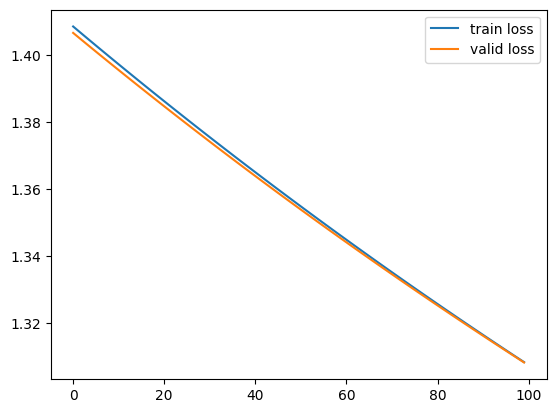

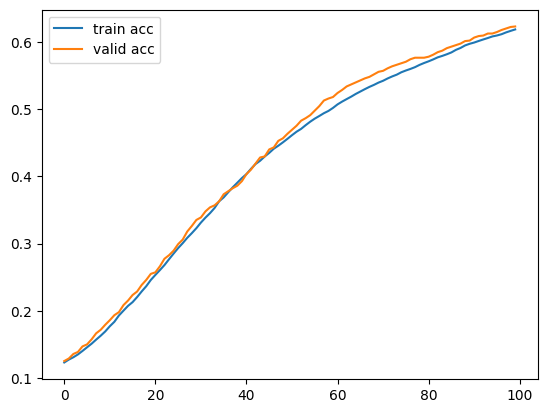

In [ ]:
#75
from tqdm import tqdm
import torch
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
torch.manual_seed(0)#シード固定しとく

#学習/評価データ読み込み
x_train = np.loadtxt("./x_train.txt", delimiter=" ")
y_train = np.loadtxt("./y_train.txt")
x_valid = np.loadtxt("./x_valid.txt", delimiter=" ")
y_valid = np.loadtxt("./y_valid.txt")
#pytorchのtensor型にする
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
x_valid = torch.tensor(x_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.int64)

#ネットワーク作成
net = torch.nn.Linear(300, 4, bias=False)
loss_fn = torch.nn.CrossEntropyLoss()

#確率的勾配降下法SGD(モデルのパラメータ，学習率)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

train_losses = []
valid_losses = []
train_accs = []
valid_accs = []

for epoch in tqdm(range(100)):
    net.train()
    optimizer.zero_grad()#勾配を0で初期化
    y_pred = net(x_train)#確率を計算
    loss = loss_fn(y_pred, y_train)#損失を計算
    loss.backward()#勾配を計算
    optimizer.step()#最適化ステップを実行

    net.eval()
    #損失の記録
    train_losses.append(loss.detach().numpy())
    valid_losses.append(loss_fn(net(x_valid), y_valid).detach().numpy())
    #カテゴリの予測
    y_max_train, y_pred_train = torch.max(net(x_train),dim=1)
    y_max_valid, y_pred_valid = torch.max(net(x_valid),dim=1)
    #正解率の記録
    train_acc = accuracy_score(y_pred_train, y_train)
    valid_acc = accuracy_score(y_pred_valid, y_valid)
    train_accs.append(train_acc)
    valid_accs.append(valid_acc)

#損失の変化をプロット
fig = plt.figure()
plt.plot(train_losses, label="train loss")
plt.plot(valid_losses, label="valid loss")
plt.legend()#凡例


#正解率の変化をプロット
fig = plt.figure()
plt.plot(train_accs, label="train acc")
plt.plot(valid_accs, label="valid acc")
plt.legend()#凡例
